<a href="https://colab.research.google.com/github/stefanoridolfi/Corso_ML/blob/master/funzione%20retta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1)Generatore di retta

#2)Genera i punti x ed y e stampa la retta
Il codice genera 500 valori di x, nell'intervallo da -250 a 250 e calcola i relativi y. Inserisce i valori di x e di y in due diverse liste, lx ed ly. Il calcolo dei valori y è eseguito utilizzando la funzione GenRetta precedente.


#3)Genera n punti random con valori compresi fra -250 e 250
La funzione genera n punti con coordinate x ed y che hanno valori casuali compresi fra -250 e 250. La funzione ritorna la lista l che è formata da n liste, ognuna delle quali contiene due elementi, i valori della coppia x ed y che sono le coordinate dei punti.


#4)Disegno la retta, genero punti, coloro i punti a seconda della posizione
Con la funzione definita prima disegno la retta di riferimento. Con la funzione di generazione dei punti creo n punti in modo casuale. A seconda del valore della y del punto decido se il punto è posizionato sopra oppure sotto la retta.
Se il punto è sopra la retta lo coloro di verde, se il punto è sotto la retta lo coloro di rosso 

#5)Definisco una funzione che genera casualmente i pesi.
La funzione genera i valori dei pesi che dovranno essere associati agli input del perceptron. I pesi hanno valori compresi fra -1 ed 1.I La funzioni ha come input il numero di input del perceptron, n è il parametro della funzione. La funzione restituisce una lista di pesi, con dimensione pari al numero di input.

5.1)Test della funzione pesi

#7) Definisco la funzione posizione
La funzione ha come input le coordinate del punto e mi restituisce il valore 1 o -1 a seconda che il punto sia sopra oppure sotto la retta di riferimento

# 8)Definisco la funzione back propagation
La funzione back propagation ha come parametri di input la lista che contiene le coordinate del punto. La funzione calcola anche il valore corretto per quel punto, la sua posizione usando la funzione posizione. L'output desiderato è il valore 1 o -1 a seconda di dove si trova il punto rispetto alla retta iniziale secondo la quale devo effettuare la classificazione dei punti. Come output la funzione restituisce    restituisce i valori dei pesi, ovvero la lista dei pesi e se la previsione era esatta oppure no. Restitisce il valore 0 se non era un'errore , 1 altrimenti. Ovvero il vaoore 0 se il valore fornito dalla funzione guess coincide o no con il valore reale

#XXX) Programma fino a questo punto
a) Disegno la retta (punto 1 del foglio)  , ovvero la retta di equazione y=0.5*x+10: che è la retta 0.5x-y+10 =0

b) Creo lista punti con coordinate casuali (punto 3 del foglio)

c) Creo la lista dei pesi (punto 5 del foglio)

d) Per ogni punto generato casualmente calcolo la funzione feed_forward (punto 6 del foglio)

e) Disegno il punto generato casualmente e lo coloro. Se la funzione feed_forward mi restituisce il valore 1 assumo che il punto casuale sia sopra la retta ipotetica di separazione e lo coloro di verde. Se mi restituisce il valore -1 assumo che il punto casuale sia sotto la retta ipotetica di separazione e lo coloro di rosso.





lista pesi=    [0.2453152633467348, -0.8120813347964131, -0.794969156627646] 



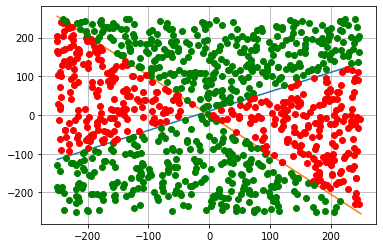

errori= 398


In [135]:
# Funzione che crea lista punti casuali
import random
def generaPunti(n):
  l=[]
  for i in range(0,n):
    x=random.random()*500-251
    y=random.random()*500-251
    l.append([x,y])
  return l


#Funzione che calcola i valori di y della retta di equazione  y=0.5*x+10
def GenRetta(x):
  y=0.5*x+10
  return y




# Funzione lista pesi
def pesi(num_input):
  import random
  pesi=[]
  for x in range(0,num_input+1):
      valore_peso=random.random()*2-1
      pesi.append(valore_peso)
  return pesi

# Funzione feed_forward
def feed_forward(inputs):
  BIAS=1
  sum=0
  for k in range(1,len(lista_pesi)):
    sum=sum+lista_pesi[k]*inputs[k-1]
  # il primo elemento della lista_pesi è il peso del BIAS per questo k va da 1, secondo elemento della lista_pesi
  sum=sum+BIAS*lista_pesi[0]
  #print("valore del guess =", sum)
  answer=-1
  y_guess =(-BIAS-inputs[0]*lista_pesi[1]/lista_pesi[2])
  #print("Y punto=", inputs[1])
  #print("y retta guess= ", y_guess)
  if  y_guess<inputs[1]:
    answer=1
  return answer

  # Funzione posizione reale del punti rispetto alla retta di riferimento
def posiz(inputs):
  answer=-1
  #valore_reale=0.5*inputs[0]+10-inputs[1]
  #print("y retta reale= ",GenRetta(inputs[0]))
  if inputs[1]>GenRetta(inputs[0]):
    answer=1
  return answer
# 
#############################################################
# Disegno la retta reale
import matplotlib.pyplot as pl
lx=[]
ly=[]
for x in range(-250,251):
  y=GenRetta(x)
  lx.append(x)
  ly.append(y)
pl.plot(lx,ly)
#pl.grid(True)
#pl.show()

#Genero lista pesi
lista_pesi=pesi(2)
print("lista pesi=   ", lista_pesi, "\n")

# disegno la retta i cui coefficienti sono i pesi + il BIAS
import matplotlib.pyplot as pl
llx=[]
lly=[]
for x in range(-250,251):
  y=(lista_pesi[0]-lista_pesi[1]*x)/lista_pesi[2]
  llx.append(x)
  lly.append(y)
pl.plot(llx,lly)
#pl.grid(True)
#pl.show()

#Genero lista dei  punti casuali
lista_punti=generaPunti(1000)
#print("lista punti generati=  ", lista_punti, "\n")


#Ad ogni punto della lista dei punti casuali applico la funzione feed_forward
#print("test feed=  ",feed_forward([10,10]))
errori=0
for punto in lista_punti:
  posizione_reale=posiz(punto)
  #print("posizione reale del punto  = ",posizione_reale)
# guess assumerà il valore 1 o -1 a seconda di dove si trova il punto calcolando la posizione utilizzando i valori dei pesi correnti
  guess=feed_forward(punto)
  #print("punto", punto)
  #print("guess del punto= ", guess, "\n")
  xp=punto[0]
  yp=punto[1]
  #errore=int(posizione_reale) - int(guess)
  if posizione_reale==guess:
    formato='go'
  else:
    formato='ro'
    errori=errori+1
     # stampo il punto
  pl.plot(xp,yp, formato)
pl.grid(True)
pl.show()
print("errori=", errori)
# Cerco i valori ottimali dei pesi  punto in lista_punti:

